In [73]:
import bz2
import lzma
import zstd
import requests
import re
import json
import time
from datetime import timedelta
from datetime import datetime as dt
import pandas as pd

In [199]:
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)

<ipython-input-199-cdf335a13422>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
data = []

In [109]:
base_url = 'https://files.pushshift.io/reddit/comments/'

for year in range(2018, 2019):  # TODO: fibure out zstd decompression so can read in 11/2018 to 12/2019
    for month in range(1, 13):
        start = time.time()
        if year == 2017 and month < 11:
            continue
        if month < 10:
            month = f"0{month}"
        else:
            month = str(month)
        request_url = f"{base_url}RC_{year}-{month}"
        print(request_url)
        
        for extension in ['.xz']:
            response = requests.get(request_url + extension)
            if response:
                print(f"successful response: {response}")
                break
            if response.status_code == 404:
                print(f"{extension} not found: {response}")
                continue
            print(f'failed response for {year}-{month}: {response}')
        else:
            print(f"couldn't find any result")
            continue
        with open('temp', 'wb') as f:
            f.write(response.content)
        
        if extension == '.bz2':
            in_file = bz2.open('temp', mode='rt')
        elif extension == '.xz':
            in_file = lzma.open('temp', mode='rt')
        
        print('reading file')
        try:
            for line in in_file:
                if '"subreddit":"fountainpens"' in line:
                    json_version = json.loads(line)
#                     if json_version not in data:
                    data.append(json_version)
        except EOFError as e:
            print(f"error with reading file: {e}")
        print(f"{year}-{month}, total is now {len(data)}, took {timedelta(seconds=time.time() - start)}")

https://files.pushshift.io/reddit/comments/RC_2018-01
successful response: <Response [200]>
reading file
2018-01, total is now 1046913, took 0:25:24.715010
https://files.pushshift.io/reddit/comments/RC_2018-02
successful response: <Response [200]>
reading file
2018-02, total is now 1077217, took 0:22:58.472570
https://files.pushshift.io/reddit/comments/RC_2018-03
successful response: <Response [200]>
reading file
2018-03, total is now 1105738, took 0:31:35.752061
https://files.pushshift.io/reddit/comments/RC_2018-04
successful response: <Response [200]>
reading file
2018-04, total is now 1134245, took 0:26:38.471760
https://files.pushshift.io/reddit/comments/RC_2018-05
successful response: <Response [200]>
reading file
2018-05, total is now 1162319, took 0:28:10.831139
https://files.pushshift.io/reddit/comments/RC_2018-06
successful response: <Response [200]>
reading file
2018-06, total is now 1186682, took 0:46:12.159946
https://files.pushshift.io/reddit/comments/RC_2018-07
successful

In [17]:
len(data)

826

Error reading 2012-10
Last completed is 2013-07

In [110]:
len(data)

1288750

In [31]:
data[0]

{'edited': False,
 'name': 't1_c3n0rvo',
 'body': '[deleted]',
 'controversiality': 0,
 'downs': 0,
 'id': 'c3n0rvo',
 'score_hidden': False,
 'score': 2,
 'author': '[deleted]',
 'link_id': 't3_p447o',
 'author_flair_text': None,
 'parent_id': 't3_p447o',
 'archived': True,
 'distinguished': None,
 'subreddit': 'fountainpens',
 'created_utc': '1328147651',
 'subreddit_id': 't5_2s0ew',
 'gilded': 0,
 'author_flair_css_class': None,
 'retrieved_on': 1428280931,
 'ups': 2}

In [111]:
df = pd.DataFrame(data)

In [112]:
df = df.drop_duplicates(subset='id')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270623 entries, 0 to 1288749
Data columns (total 62 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   edited                         1270623 non-null  object        
 1   name                           314448 non-null   object        
 2   body                           1270623 non-null  object        
 3   controversiality               1270623 non-null  int64         
 4   downs                          314448 non-null   float64       
 5   id                             1270623 non-null  object        
 6   score_hidden                   419558 non-null   object        
 7   score                          1270623 non-null  int64         
 8   author                         1270623 non-null  object        
 9   link_id                        1270623 non-null  object        
 10  author_flair_text              556603 non-null   objec

In [191]:
df['replies'].value_counts()

    9997
Name: replies, dtype: int64

In [129]:
df.head()

edited        name                                               body  \
1  False  t1_c3n1l8z  Count me in among the people who saw this thro...   
2  False  t1_c3o05gu  I find that the paper used in the Moleskine no...   
3  False  t1_c3o0c82  The Mnemosyne notebooks, from japan, (get them...   
4  False  t1_c3o0egr  I don't mind the waiting at all. \nThe major p...   
5  False  t1_c3o12fy  I've always had bad luck with Moleskines. They...   

   controversiality  downs       id score_hidden  score               author  \
1                 0    0.0  c3n1l8z        False      1            rynthetyn   
2                 0    0.0  c3o05gu        False      4            shihchiun   
3                 0    0.0  c3o0c82        False      1  prepare_for_maximin   
4                 0    0.0  c3o0egr        False      1                skkew   
5                 0    0.0  c3o12fy        False      4          kidnappster   

    link_id author_flair_text   parent_id archived distinguished  \
1  t3_p447o              None  t1_c3mduix     True          None   
2  t3_pber1              None    t3_pber1     True          None   
3  t3_o2q3v              None    t3_o2q3v     True          None   
4  t3_pber1              None  t1_c3o05gu     True          None   
5  t3_pber1              None    t3_pber1     True          None   

      subreddit         created_utc subreddit_id  gilded  \
1  fountainpens 2012-02-02 03:11:11     t5_2s0ew       0   
2  fountainpens 2012-02-05 03:21:45     t5_2s0ew       0   
3  fountainpens 2012-02-05 03:44:36     t5_2s0ew       0   
4  fountainpens 2012-02-05 03:52:08     t5_2s0ew       0   
5  fountainpens 2012-02-05 05:09:55     t5_2s0ew       0   

  author_flair_css_class        retrieved_on  ups removal_reason  \
1                   None 2015-04-06 00:48:28  1.0            NaN   
2                   None 2015-04-06 05:25:26  4.0            NaN   
3                   None 2015-04-06 05:26:54  1.0            NaN   
4                   None 2015-04-06 05:27:21  1.0            NaN   
5                   None 2015-04-06 05:32:36  4.0            NaN   

   report_reasons  approved_by saved user_reports  banned_by  likes body_html  \
1             NaN          NaN   NaN          NaN        NaN    NaN       NaN   
2             NaN          NaN   NaN          NaN        NaN    NaN       NaN   
3             NaN          NaN   NaN          NaN        NaN    NaN       NaN   
4             NaN          NaN   NaN          NaN        NaN    NaN       NaN   
5             NaN          NaN   NaN          NaN        NaN    NaN       NaN   

  mod_reports  created  num_reports replies stickied author_cakeday can_gild  \
1         NaN      NaN          NaN     NaN      NaN            NaN      NaN   
2         NaN      NaN          NaN     NaN      NaN            NaN      NaN   
3         NaN      NaN          NaN     NaN      NaN            NaN      NaN   
4         NaN      NaN          NaN     NaN      NaN            NaN      NaN   
5         NaN      NaN          NaN     NaN      NaN            NaN      NaN   

  approved_at_utc can_mod_post collapsed collapsed_reason  banned_at_utc  \
1             NaT          NaN       NaN              NaN            NaN   
2             NaT          NaN       NaN              NaN            NaN   
3             NaT          NaN       NaN              NaN            NaN   
4             NaT          NaN       NaN              NaN            NaN   
5             NaT          NaN       NaN              NaN            NaN   

  is_submitter permalink subreddit_type  mod_note  mod_reason_by  \
1          NaN       NaN            NaN       NaN            NaN   
2          NaN       NaN            NaN       NaN            NaN   
3          NaN       NaN            NaN       NaN            NaN   
4          NaN       NaN            NaN       NaN            NaN   
5          NaN       NaN            NaN       NaN            NaN   

   mod_reason_title no_follow send_replies author_flair_t

In [116]:
df.created_utc = pd.to_datetime(df.created_utc, unit='s')
df.retrieved_on = pd.to_datetime(df.retrieved_on, unit='s')
df.author_created_utc = pd.to_datetime(df.author_created_utc, unit='s')
df.approved_at_utc = pd.to_datetime(df.approved_at_utc, unit='s')
df = df.drop(columns=["created_timestamp", "retrieved_on_timestamp"])
df.describe(include='all')

edited        name       body  controversiality     downs       id  \
count   1270623      314448    1270623      1.270623e+06  314448.0  1270623   
unique    40816      314448    1200880               NaN       NaN  1270623   
top       False  t1_ceauvdb  [deleted]               NaN       NaN  dvspvpm   
freq    1229668           1      30058               NaN       NaN        1   
first       NaN         NaN        NaN               NaN       NaN      NaN   
last        NaN         NaN        NaN               NaN       NaN      NaN   
mean        NaN         NaN        NaN      9.430020e-03       0.0      NaN   
std         NaN         NaN        NaN      9.664938e-02       0.0      NaN   
min         NaN         NaN        NaN      0.000000e+00       0.0      NaN   
25%         NaN         NaN        NaN      0.000000e+00       0.0      NaN   
50%         NaN         NaN        NaN      0.000000e+00       0.0      NaN   
75%         NaN         NaN        NaN      0.000000e+00       0.0      NaN   
max         NaN         NaN        NaN      1.000000e+00       0.0      NaN   

       score_hidden         score     author    link_id author_flair_text  \
count        419558  1.270623e+06    1270623    1270623            556603   
unique            2           NaN      42508      87544                 1   
top           False           NaN  [deleted]  t3_544vlm                     
freq         417812           NaN      40699       1215            556603   
first           NaN           NaN        NaN        NaN               NaN   
last            NaN           NaN        NaN        NaN               NaN   
mean            NaN  2.809967e+00        NaN        NaN               NaN   
std             NaN  5.923678e+00        NaN        NaN               NaN   
min             NaN -1.310000e+02        NaN        NaN               NaN   
25%             NaN  1.000000e+00        NaN        NaN               NaN   
50%             NaN  2.000000e+00        NaN        NaN               NaN   
75%             NaN  3.000000e+00        NaN        NaN               NaN   
max             NaN  1.016000e+03        NaN        NaN               NaN   

        parent_id archived distinguished     subreddit          created_utc  \
count     1270623   497460          2492       1270623              1270623   
unique     699896        2             2             1              1262164   
top     t3_544vlm    False     moderator  fountainpens  2016-04-30 06:10:59   
freq         1157   361871          2487       1270623                   18   
first         NaN      NaN           NaN           NaN  2010-09-03 13:46:42   
last          NaN      NaN           NaN           NaN  2018-10-31 23:58:25   
mean          NaN      NaN           NaN           NaN                  NaN   
std           NaN      NaN           NaN           NaN                  NaN   
min           NaN      NaN           NaN           NaN                  NaN   
25%           NaN      NaN           NaN           NaN                  NaN   
50%           NaN      NaN           NaN           NaN                  NaN   
75%           NaN      NaN           NaN           NaN                  NaN   
max           NaN      NaN           NaN           NaN                  NaN   

       subreddit_id        gilded author_flair_css_class         retrieved_on  \
count       1270623  1.270623e+06                 556979              1268659   
unique            1           NaN                     37              1240911   
top        t5_2s0ew           NaN             format f64  2016-05-21 00:17:46   
freq        1270623           NaN                  89753                   36   
first           NaN           NaN                    NaN  2015-02-16 10:07:08   
last            NaN           NaN                    NaN  2018-11-08 14:46:20   
mean            NaN  1.141172e-04                    NaN                  NaN   
std             NaN  1.068196e-02                    NaN            

In [117]:
df.to_csv('fountainpens-comments_2010_2018-10.csv')

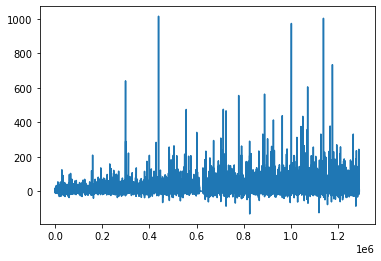

In [118]:
df['score'].plot()

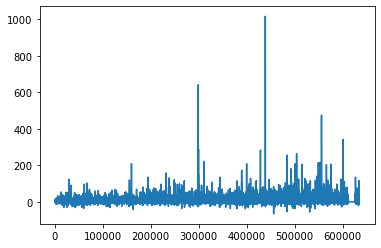

In [119]:
df['ups'].plot()

In [121]:
df['downs'].value_counts()

0.0    314448
Name: downs, dtype: int64

In [127]:
df = df[df['body'] != "[deleted]"]

In [158]:
df[df['body'].isna()]

Empty DataFrame
Columns: [edited, name, body, controversiality, downs, id, score_hidden, score, author, link_id, author_flair_text, parent_id, archived, distinguished, subreddit, created_utc, subreddit_id, gilded, author_flair_css_class, retrieved_on, ups, removal_reason, report_reasons, approved_by, saved, user_reports, banned_by, likes, body_html, mod_reports, created, num_reports, replies, stickied, author_cakeday, can_gild, approved_at_utc, can_mod_post, collapsed, collapsed_reason, banned_at_utc, is_submitter, permalink, subreddit_type, mod_note, mod_reason_by, mod_reason_title, no_follow, send_replies, author_flair_template_id, author_flair_background_color, author_flair_richtext, author_flair_text_color, author_flair_type, rte_mode, author_created_utc, author_fullname, subreddit_name_prefixed, gildings, author_patreon_flair]
Index: []

In [159]:
df[df['id'].isna()]

Empty DataFrame
Columns: [edited, name, body, controversiality, downs, id, score_hidden, score, author, link_id, author_flair_text, parent_id, archived, distinguished, subreddit, created_utc, subreddit_id, gilded, author_flair_css_class, retrieved_on, ups, removal_reason, report_reasons, approved_by, saved, user_reports, banned_by, likes, body_html, mod_reports, created, num_reports, replies, stickied, author_cakeday, can_gild, approved_at_utc, can_mod_post, collapsed, collapsed_reason, banned_at_utc, is_submitter, permalink, subreddit_type, mod_note, mod_reason_by, mod_reason_title, no_follow, send_replies, author_flair_template_id, author_flair_background_color, author_flair_richtext, author_flair_text_color, author_flair_type, rte_mode, author_created_utc, author_fullname, subreddit_name_prefixed, gildings, author_patreon_flair]
Index: []

In [163]:
df = df[df['body'] != ""]

In [166]:
df['edited'].value_counts()

False         1202356
True               56
1523031817          2
1425051405          2
1516118252          2
               ...   
1409242487          1
1426019700          1
1506628979          1
1488832207          1
1465581430          1
Name: edited, Length: 38139, dtype: int64

In [173]:
df[df['body'].str.contains('∆')]['body']

Series([], Name: body, dtype: object)

In [176]:
bad_ids = [5939, 13987,13988,13989,13990,13991,13992,
 15324, 20217,
 20218, 25965,
 26838, 26839,
 27193, 27194,
 27195, 27290,
 27326, 27840,
 27841, 32032,
 32065, 32066,
 32067, 32068,
 32069, 32070,
 46687, 65518,
 65519, 68268,
 68818, 69771,
 71535, 71536,
 71537, 71681,
 72016,74279,
 76196, 95599,
 100525, 126271,
 127816, 133499,
 142805, 145207,
 145989, 147201,
 147202, 147203,
 150228, 153222,
 169098, 171236,
 171237, 175669,
 179785, 214378,
 220933, 220934,
 222013, 223141,
 236755, 244808,
 244809, 256954,
 258072,
 258547,
 258548,
 258549,
 258550,
 258551,
 301840,
 306840,
 306841,
 306842,
 306843,
 306844,
 311136,
 311137,
 321537,
 330238,
 334523,
 335038,
 335039,
 335040,
 335041,
 342670,
 342680,
 342681,
 343619,
 344943,
 357100,
 357465,
 357989,
 371414,
 371828,
 371883,
 371884,
 373692,
 383330,
 383332,
 383333,
 383334,
 383341,
 383342,
 383343,
 383347,
 383348,
 383639,
 384602,
 385619,
 385954,
 385958,
 386984,
 386985,
 386986,
 386987,
 388262,
 388263,
 388268,
 389022,
 391830,
 391841,
 391842,
 392814,
 393760,
 394277,
 400332,
 400333,
 401401,
 401697,
 401718,
 403262,
 404593,
 404594,
 405391,
 405392,
 405393,
 405394,
 405395,
 405892,
 406428,
 411954,
 411955,
 411956,
 414405,
 420024,
 420025,
 420943,
 421842,
 421843,
 423372,
 429058,
 429059,
 429273,
 429287,
 438813,
 442144,
 442145,
 454150,
 461004,
 461005,
 464983,
 464984,
 465716,
 465798,
 468094,
 475741,
 475742,
 483885,
 503905,
 525093,
 530213,
 530214,
 532684,
 532699,
 542420,
 551376,
 551639,
 551640,
 553435,
 558274,
 565085,
 572350,
 572351,
 579105,
 579106,
 579107,
 580006,
 592176,
 599447,
 599448,
 609266,
 611912,
 611913,
 613475,
 638600,
 640481,
 641442,
 645808,
 653234,
 657721,
 659264,
 659265,
 686224,
 687232,
 687398,
 691053,
 706024,
 719371,
 719388,
 721807,
 735627,
 735690,
 735691,
 738753,
 738754,
 739839,
 743683,
 751907,
 751908,
 757957,
 764260,
 764261,
 764262,
 764329,
 770131,
 776582,
 776583,
 785709,
 797894,
 801887,
 804892,
 807588,
 832698,
 832699,
 853943,
 855049,
 858140,
 867357,
 873728,
 873729,
 873730,
 874336,
 874337,
 879190,
 934358,
 938650,
 1074966,
 1233167]

In [184]:
df.iloc[bad_ids, :]['created_utc'].dt.year.value_counts()

2016    84
2015    68
2017    44
2013    27
2014    26
2018     2
2012     1
Name: created_utc, dtype: int64

In [186]:
df = df.drop(df.index[bad_ids])

In [188]:
df[df['body'] == '0.0']

Empty DataFrame
Columns: [edited, name, body, controversiality, downs, id, score_hidden, score, author, link_id, author_flair_text, parent_id, archived, distinguished, subreddit, created_utc, subreddit_id, gilded, author_flair_css_class, retrieved_on, ups, removal_reason, report_reasons, approved_by, saved, user_reports, banned_by, likes, body_html, mod_reports, created, num_reports, replies, stickied, author_cakeday, can_gild, approved_at_utc, can_mod_post, collapsed, collapsed_reason, banned_at_utc, is_submitter, permalink, subreddit_type, mod_note, mod_reason_by, mod_reason_title, no_follow, send_replies, author_flair_template_id, author_flair_background_color, author_flair_richtext, author_flair_text_color, author_flair_type, rte_mode, author_created_utc, author_fullname, subreddit_name_prefixed, gildings, author_patreon_flair]
Index: []

In [193]:
df = df[df['body'] != '[removed]']

In [195]:
df[df['body'].isna()]

Empty DataFrame
Columns: [edited, name, body, controversiality, downs, id, score_hidden, score, author, link_id, author_flair_text, parent_id, archived, distinguished, subreddit, created_utc, subreddit_id, gilded, author_flair_css_class, retrieved_on, ups, removal_reason, report_reasons, approved_by, saved, user_reports, banned_by, likes, body_html, mod_reports, created, num_reports, replies, stickied, author_cakeday, can_gild, approved_at_utc, can_mod_post, collapsed, collapsed_reason, banned_at_utc, is_submitter, permalink, subreddit_type, mod_note, mod_reason_by, mod_reason_title, no_follow, send_replies, author_flair_template_id, author_flair_background_color, author_flair_richtext, author_flair_text_color, author_flair_type, rte_mode, author_created_utc, author_fullname, subreddit_name_prefixed, gildings, author_patreon_flair]
Index: []

In [194]:
df.to_csv('fountainpens-comments_2010_2018-10_id_body.csv', index=False, columns=['body', 'id', 'score', 'author', 'parent_id', 'created_utc', 'body_html', 'is_submitter'])

In [196]:
df.to_csv('fountainpens-comments_2010_2018-10_body_id.csv', index=False, columns=['body', 'id'])

In [202]:
df.iloc[[16383,16384],:]['body']

19882    Just so it's clear, I didn't really expect it to be any good in a tactical situation which is why I put it in quotes. I just though it would be interesting because it would be a relatively substantial (weight) pen at a decent cost if it wrote well. It seems like it doesn't so that's that.\nThanks.
19883    What does he charge at a pen show for a grinding? I've got a VP that I don't care much for, and I'd like to like it.                                                                                                                                                                                      
Name: body, dtype: object

In [209]:
newline = re.compile(r'\r|\n')
df['body'] = df['body'].str.replace(newline, " ")

<ipython-input-209-43aff0c107cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'] = df['body'].str.replace(newline, " ")


In [211]:
df.to_csv('fountainpens-comments_2010_2018-10_nonewline.csv', index=False)

In [212]:
data[0]

{'edited': False,
 'name': 't1_c3n0rvo',
 'body': '[deleted]',
 'controversiality': 0,
 'downs': 0,
 'id': 'c3n0rvo',
 'score_hidden': False,
 'score': 2,
 'author': '[deleted]',
 'link_id': 't3_p447o',
 'author_flair_text': None,
 'parent_id': 't3_p447o',
 'archived': True,
 'distinguished': None,
 'subreddit': 'fountainpens',
 'created_utc': '1328147651',
 'subreddit_id': 't5_2s0ew',
 'gilded': 0,
 'author_flair_css_class': None,
 'retrieved_on': 1428280931,
 'ups': 2,
 'created_timestamp': datetime.datetime(2012, 2, 1, 20, 54, 11),
 'retrieved_on_timestamp': datetime.datetime(2015, 4, 5, 20, 42, 11)}

In [216]:
pattern = re.compile(r'\n|\r')
problems = list(filter(lambda x: pattern.match(x['body']), data))

In [217]:
problems

[{'link_id': 't3_sd6uz',
  'author_flair_text': None,
  'score': 1,
  'archived': True,
  'author': 'joej',
  'retrieved_on': 1428747595,
  'name': 't1_c4ds0qv',
  'controversiality': 0,
  'edited': False,
  'id': 'c4ds0qv',
  'gilded': 0,
  'downs': 0,
  'body': '\nif you do like that Vertex pen ... there are lots of [picts of various ones](http://www.penturners.org/forum/search.php?searchid=6629200&amp;photoplog_searchinfo=1&amp;photoplog_searchquery=vertex) over at that penturners.org',
  'score_hidden': False,
  'distinguished': None,
  'subreddit_id': 't5_2s0ew',
  'subreddit': 'fountainpens',
  'author_flair_css_class': None,
  'parent_id': 't3_sd6uz',
  'ups': 1,
  'created_utc': '1334768594',
  'created_timestamp': datetime.datetime(2012, 4, 18, 13, 3, 14),
  'retrieved_on_timestamp': datetime.datetime(2015, 4, 11, 6, 19, 55)},
 {'distinguished': None,
  'controversiality': 0,
  'subreddit': 'fountainpens',
  'ups': 1,
  'subreddit_id': 't5_2s0ew',
  'parent_id': 't1_c4dm695',


In [218]:
len(problems)

981

In [219]:
problem_df = pd.DataFrame(problems)
problem_df.to_csv('problems.csv', index=False)

In [220]:
problem_read_df = pd.read_csv('problems.csv')

In [223]:
problem_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   link_id                        981 non-null    object 
 1   author_flair_text              0 non-null      float64
 2   score                          981 non-null    int64  
 3   archived                       308 non-null    object 
 4   author                         981 non-null    object 
 5   retrieved_on                   980 non-null    float64
 6   name                           230 non-null    object 
 7   controversiality               981 non-null    int64  
 8   edited                         981 non-null    object 
 9   id                             981 non-null    object 
 10  gilded                         981 non-null    int64  
 11  downs                          230 non-null    float64
 12  body                           981 non-null    obj